In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold,RepeatedStratifiedKFold,cross_val_score
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, f1_score,make_scorer
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

In [2]:
micron = pd.read_csv("C://Users//sreel//Downloads//Data Science Data//Micron//Python & ML Test data//micron.csv")

In [3]:
micron

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,y
0,0.154163,0.740050,0.263315,270.043359,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,...,0.485377,0.768134,0.160717,0.764560,0.020810,0.135210,Very Cold,0.116273,0.309898,4
1,0.671453,0.471230,0.816168,825.541438,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,...,0.177564,0.962597,0.419250,0.424052,0.463149,0.373723,Cold,0.465508,0.035168,1
2,0.084273,0.732521,0.636200,642.175709,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,...,0.461440,0.894743,0.605778,0.603356,0.443872,0.480047,Cold,0.888448,0.208500,2
3,0.944581,0.073470,0.595152,595.983158,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,...,0.946556,0.857191,0.688928,0.003288,0.900103,0.919865,Very Hot,0.005909,0.642926,0
4,0.385217,0.595742,0.610807,617.289384,0.599619,0.312284,0.069874,0.800734,0.911434,0.194675,...,0.333832,0.778473,0.135435,0.191711,0.402589,0.786844,NaN,0.253808,0.109485,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.457958,0.642367,0.525224,526.211535,0.908973,0.041879,0.314760,NaN,0.618821,0.473398,...,0.116284,0.127008,0.853264,0.204691,0.824045,0.232227,Very Cold,0.242143,0.718839,4
17996,0.398603,0.576079,0.079975,83.556340,0.478481,0.843795,0.256441,0.849709,0.620136,0.251116,...,0.093917,0.185403,0.808505,0.095233,0.776949,0.841992,Very Hot,0.946554,0.150952,0
17997,0.455671,0.098704,0.417840,421.420511,0.302754,0.591551,0.470392,0.748002,0.746729,0.744290,...,0.745924,0.440073,0.682202,0.209295,0.832271,0.880627,Very Hot,0.099026,0.746490,0
17998,0.052394,0.896098,0.731967,735.626798,11.000000,0.314701,0.423992,0.246733,0.446040,0.296398,...,0.832404,0.273394,0.293221,0.898085,0.427504,0.257505,Cold,0.212691,0.293841,2


In [4]:
micron = micron.dropna(axis = 0, how='any')

In [5]:
micron_y = micron.y
micron_x = micron.drop(['y'],axis = 1)

In [6]:
labelEncoder = LabelEncoder()
micron_x['26'] =  labelEncoder.fit_transform(micron_x['26'])

In [7]:
micron_x

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.154163,0.740050,0.263315,270.043359,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,...,33.773638,0.485377,0.768134,0.160717,0.764560,0.020810,0.135210,2,0.116273,0.309898
1,0.671453,0.471230,0.816168,825.541438,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,...,44.868382,0.177564,0.962597,0.419250,0.424052,0.463149,0.373723,0,0.465508,0.035168
2,0.084273,0.732521,0.636200,642.175709,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,...,29.959908,0.461440,0.894743,0.605778,0.603356,0.443872,0.480047,0,0.888448,0.208500
3,0.944581,0.073470,0.595152,595.983158,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,...,43.867159,0.946556,0.857191,0.688928,0.003288,0.900103,0.919865,3,0.005909,0.642926
5,0.930676,0.126387,0.605005,614.654922,0.290122,0.626529,0.659476,0.067726,0.355443,0.334724,...,89.616807,0.912784,0.169898,0.316808,0.241780,0.490955,0.543943,1,0.405454,0.742410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,0.469430,0.185786,0.397763,400.225283,0.856550,0.247861,0.400387,0.168066,0.549127,0.236216,...,10.110342,0.702607,0.670205,0.132249,0.114157,0.127146,0.143075,2,0.395883,0.623898
17996,0.398603,0.576079,0.079975,83.556340,0.478481,0.843795,0.256441,0.849709,0.620136,0.251116,...,66.983756,0.093917,0.185403,0.808505,0.095233,0.776949,0.841992,3,0.946554,0.150952
17997,0.455671,0.098704,0.417840,421.420511,0.302754,0.591551,0.470392,0.748002,0.746729,0.744290,...,8.794238,0.745924,0.440073,0.682202,0.209295,0.832271,0.880627,3,0.099026,0.746490
17998,0.052394,0.896098,0.731967,735.626798,11.000000,0.314701,0.423992,0.246733,0.446040,0.296398,...,75.159494,0.832404,0.273394,0.293221,0.898085,0.427504,0.257505,0,0.212691,0.293841


In [8]:
cor_matrix = micron_x.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]

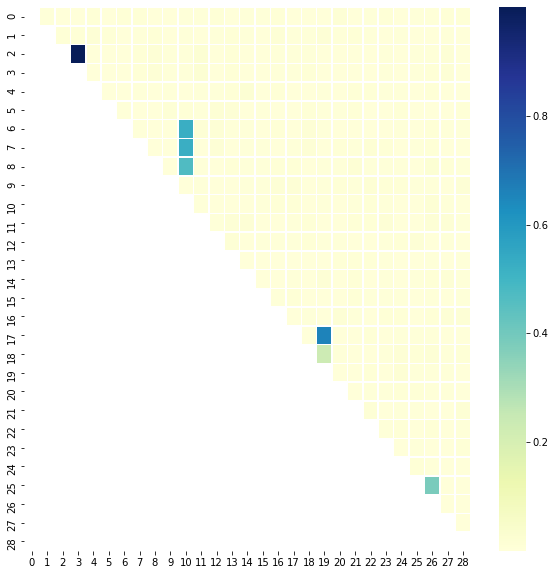

In [9]:
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(upper_tri,linewidth = 0.5, cmap = 'YlGnBu', ax = ax)
plt.show()

In [10]:
micron_x = micron_x.drop(micron_x[to_drop],axis = 1)

In [11]:
micron_x.iloc[:,0:10].describe()

,0,1,2,4,5,6,7,8,9,10
count,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000
mean,0.497416,0.502429,0.494918,0.502924,0.502263,0.504650,0.502949,0.500275,0.499219,1.508406
std,0.290378,0.289872,0.288804,0.650601,0.305243,0.289188,0.287547,0.326936,0.568248,0.548172
min,0.000027,0.000091,0.000004,0.000010,0.000005,0.000062,0.000006,0.000028,0.000012,0.044788
25%,0.241130,0.253428,0.246246,0.251793,0.251797,0.252292,0.256196,0.251314,0.245523,1.161831
50%,0.496566,0.502124,0.490495,0.495894,0.502583,0.506367,0.508189,0.496118,0.492651,1.508540
75%,0.748921,0.755959,0.743823,0.745342,0.751882,0.758020,0.748301,0.750380,0.745178,1.856096
max,0.999991,0.999966,0.999946,78.000000,14.000000,0.999948,0.999886,21.000000,66.000000,32.000000


In [12]:
micron_x.iloc[:,10:20].describe()

,11,12,13,14,15,16,17,18,19,20
count,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000
mean,0.498934,0.502361,0.504845,0.503143,0.503579,0.498345,0.495767,0.502951,29.624149,0.502652
std,0.288473,0.505776,0.330781,0.289507,0.340557,0.288740,0.289563,0.782300,21.778622,0.434634
min,0.000048,0.000025,0.000225,0.000022,0.000055,0.000010,0.000163,0.000058,5.000000,0.000128
25%,0.249635,0.247147,0.254372,0.253594,0.257604,0.250291,0.243296,0.252146,11.658374,0.248314
50%,0.498013,0.500812,0.505666,0.504531,0.503188,0.496416,0.492491,0.498322,23.188448,0.500662
75%,0.750102,0.748006,0.756904,0.754694,0.751370,0.747897,0.746783,0.743370,42.682542,0.751316
max,0.999977,56.000000,22.000000,0.999841,25.000000,0.999975,0.999742,98.000000,104.947610,44.000000


In [13]:
micron_x.iloc[:,20:30].describe()

,21,22,23,24,25,26,27,28
count,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000
mean,0.502302,0.501624,0.498864,0.497438,0.499131,1.495650,0.501152,0.496044
std,0.331214,0.287850,0.376578,0.287855,0.288107,1.119154,0.401556,0.288059
min,0.000040,0.000025,0.000014,0.000168,0.000021,0.000000,0.000010,0.000043
25%,0.249934,0.251800,0.246246,0.250598,0.250345,0.000000,0.250638,0.243309
50%,0.503831,0.505193,0.496341,0.496385,0.498202,1.000000,0.494618,0.493042
75%,0.753459,0.750321,0.744940,0.743172,0.748939,2.000000,0.746931,0.745249
max,22.000000,0.999909,33.000000,0.999900,0.999859,3.000000,33.000000,0.999877


0


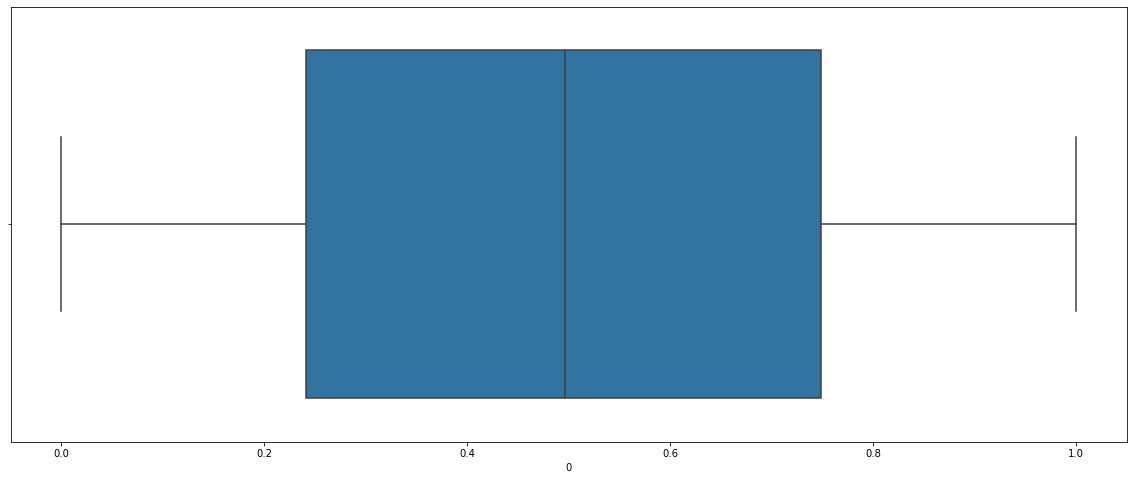

1


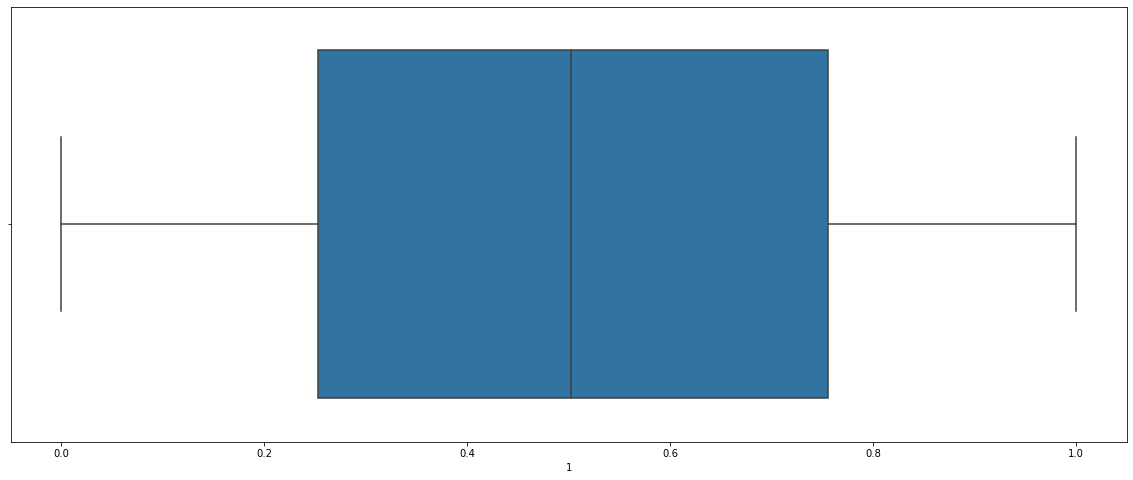

2


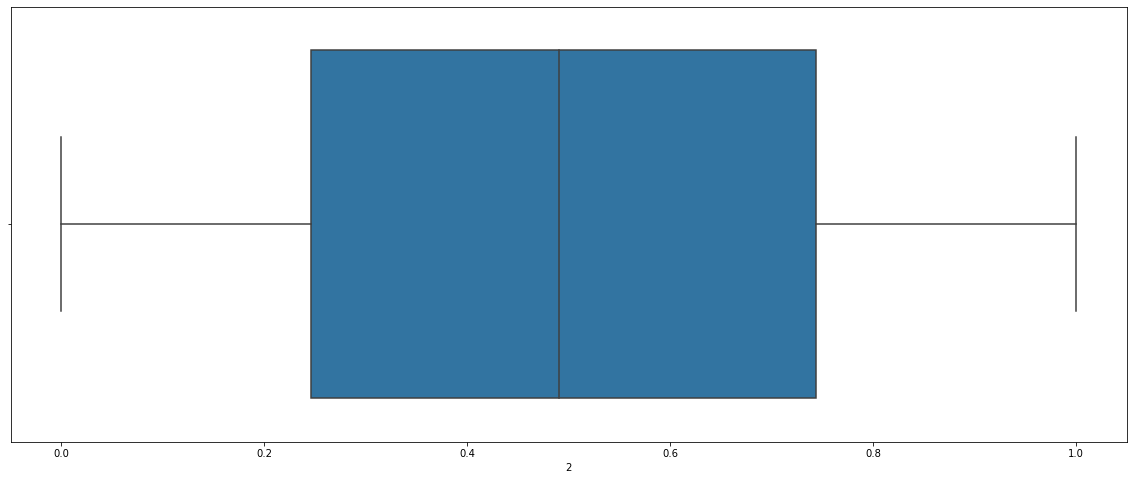

4


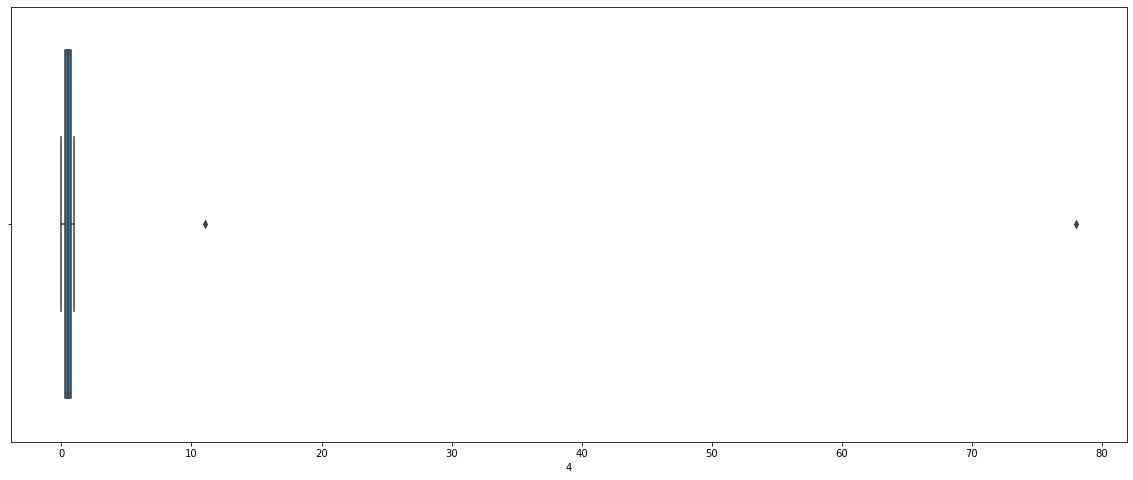

5


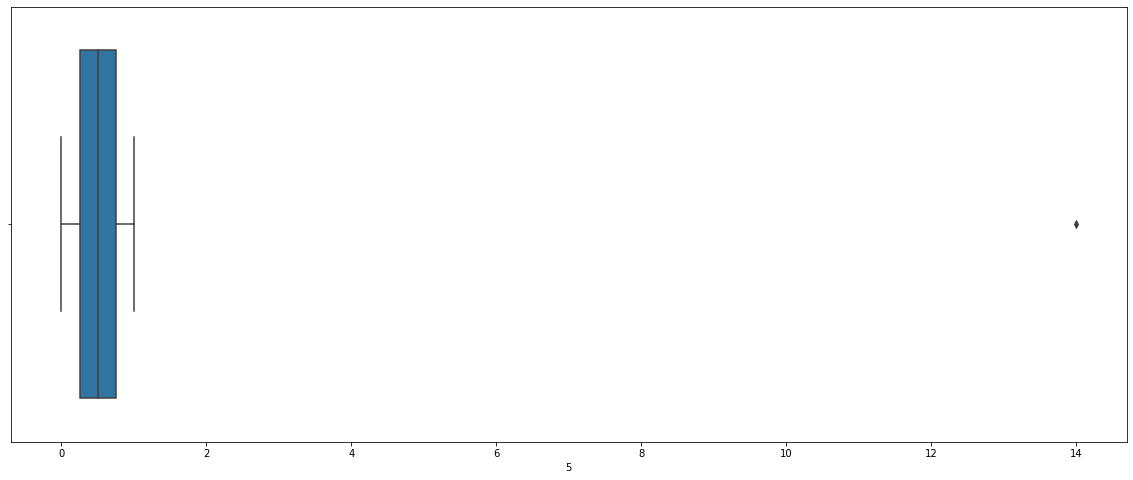

6


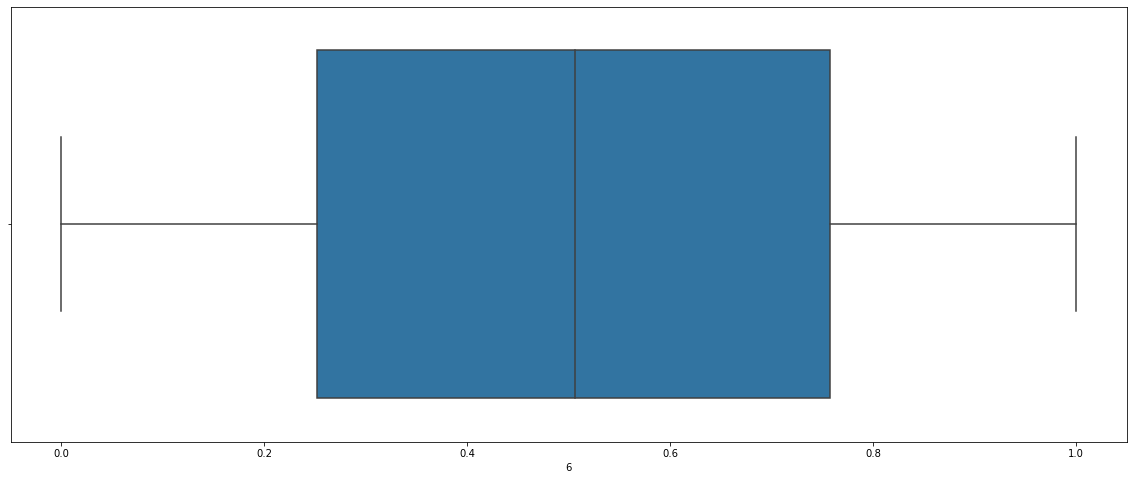

7


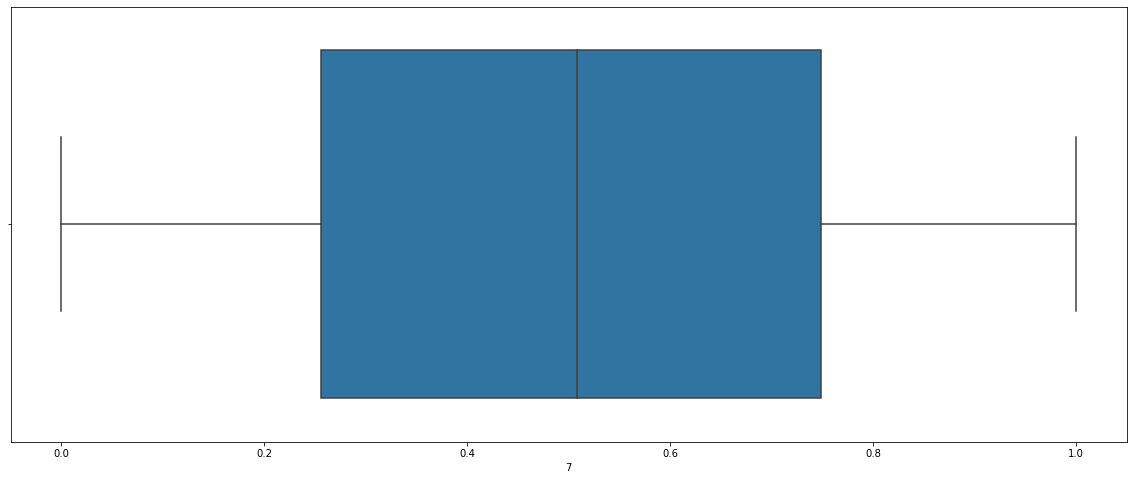

8


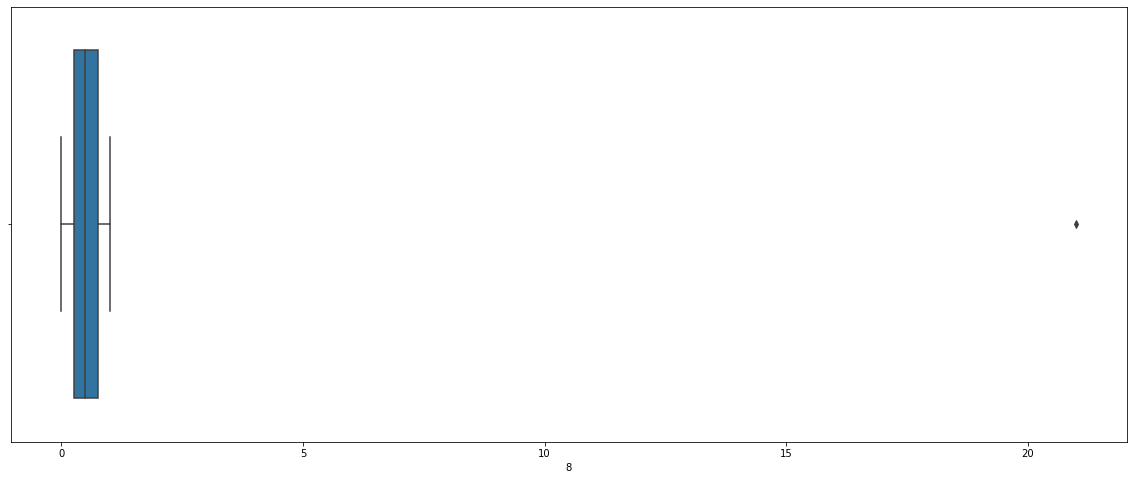

9


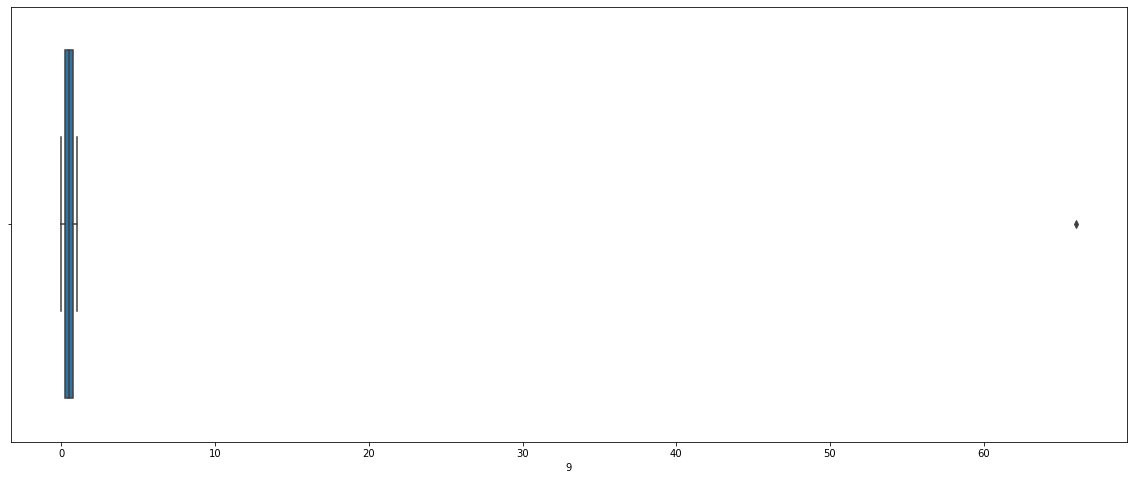

10


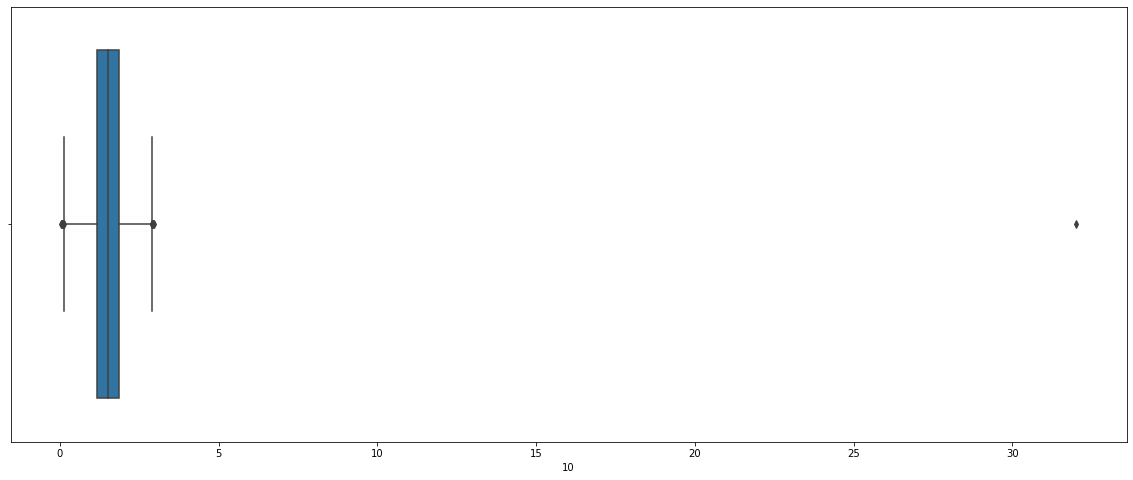

11


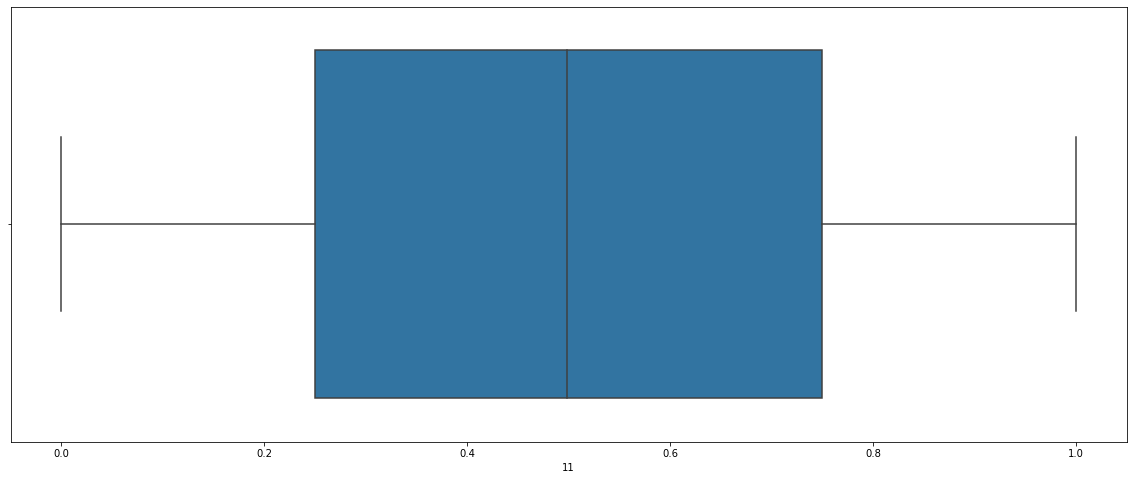

12


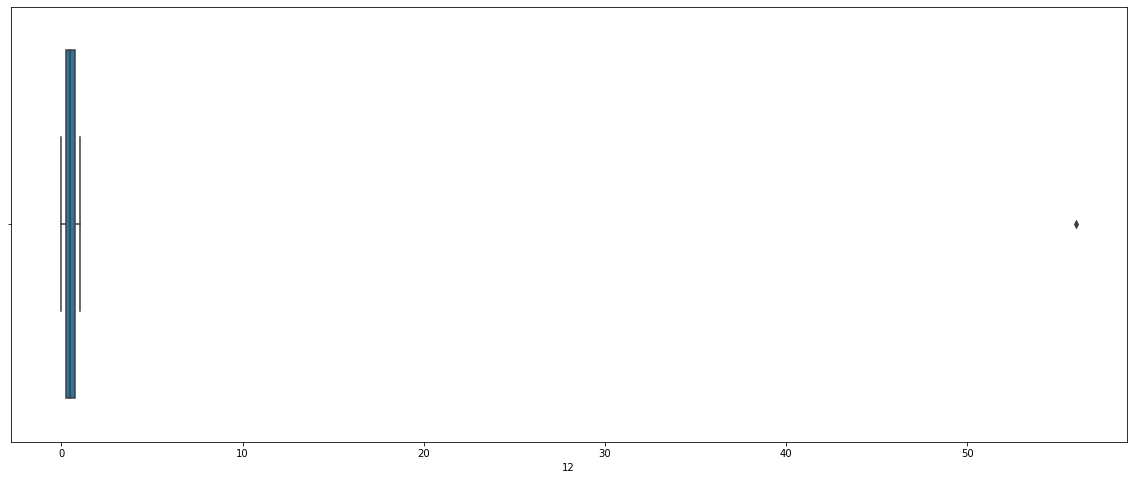

13


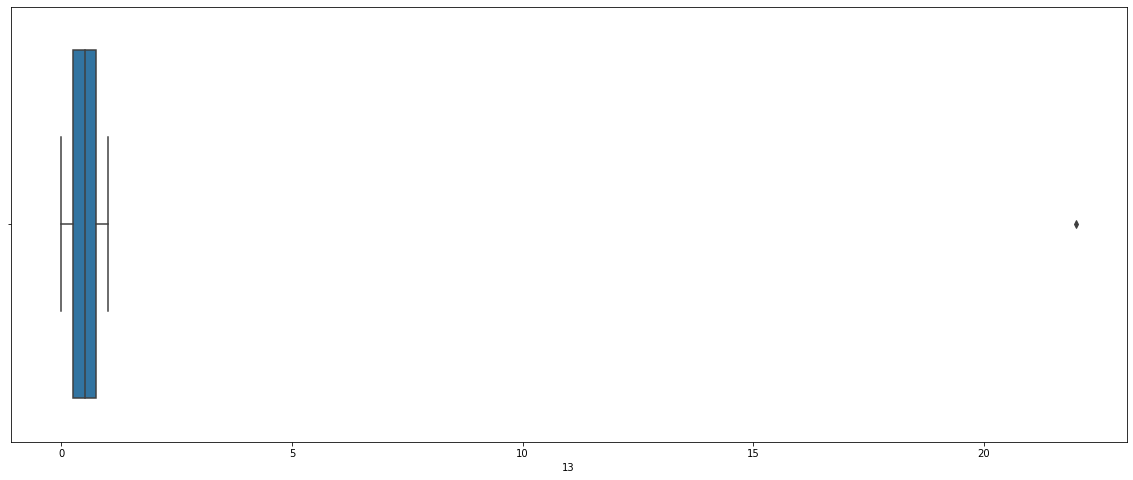

14


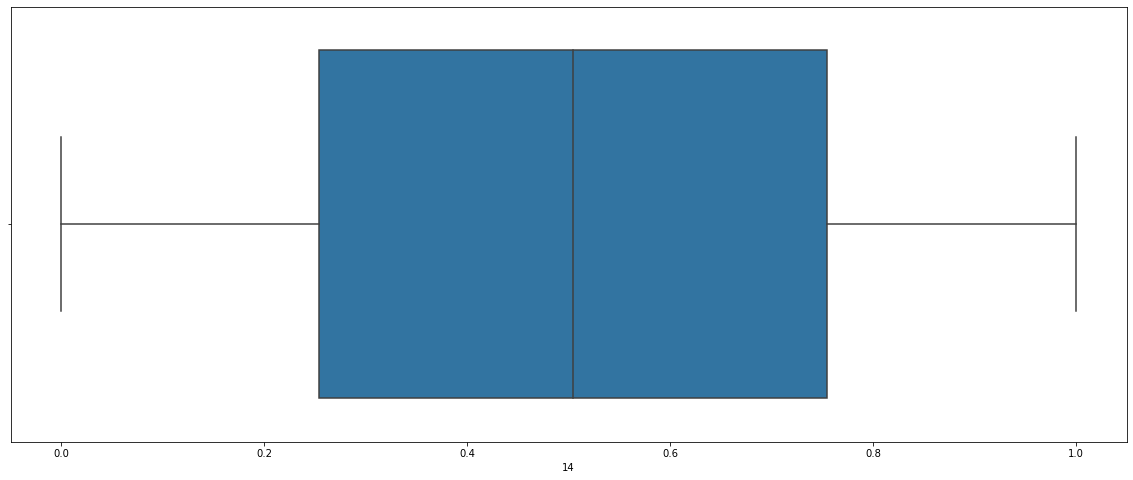

15


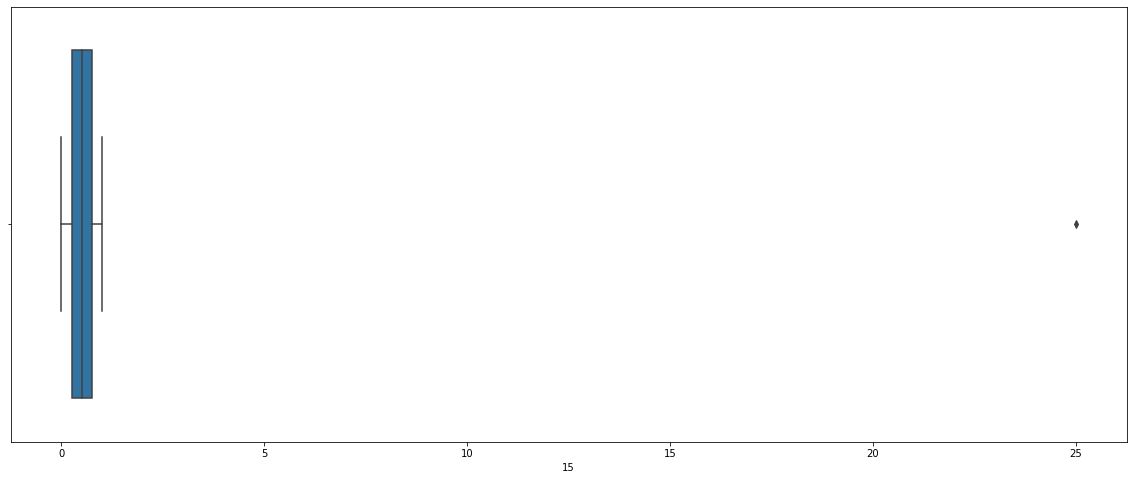

16


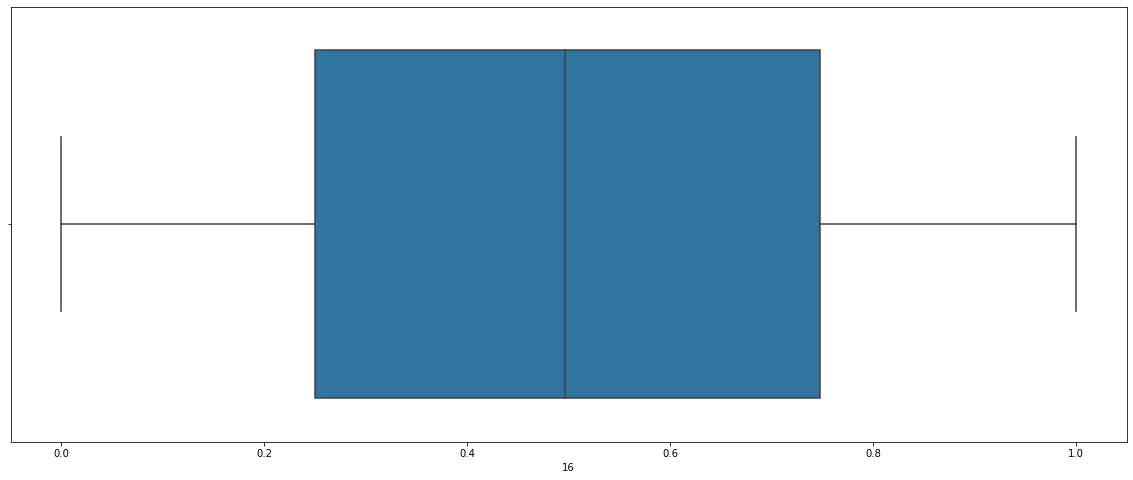

17


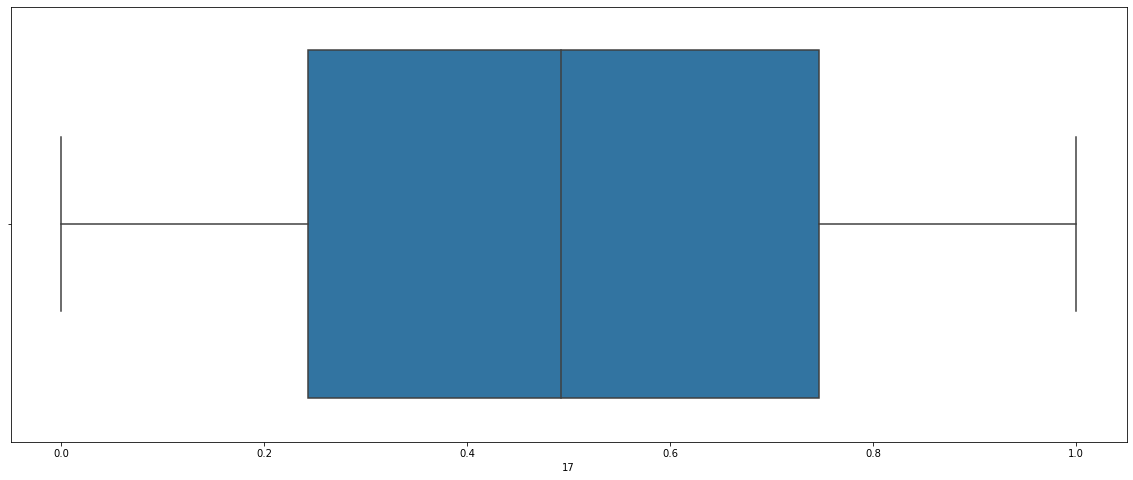

18


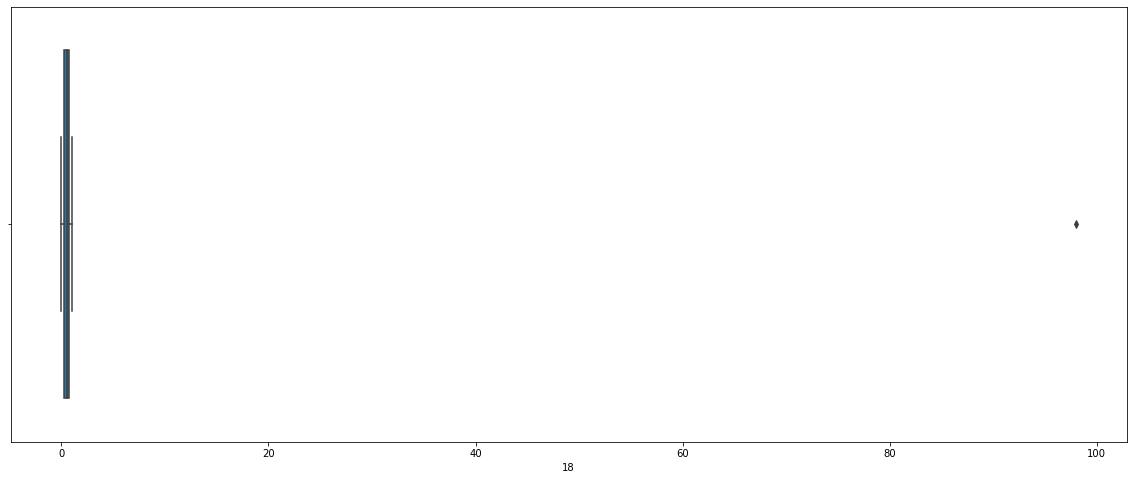

19


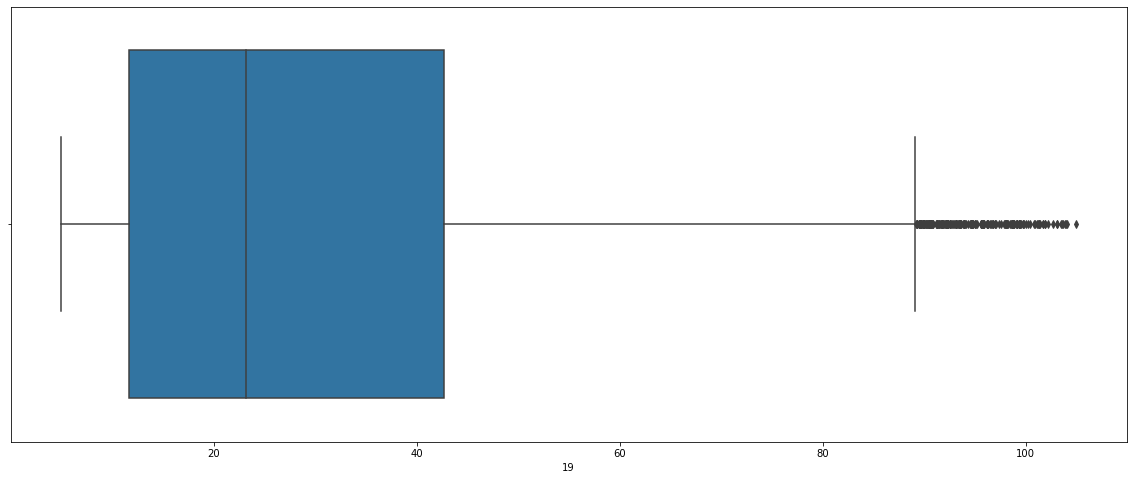

20


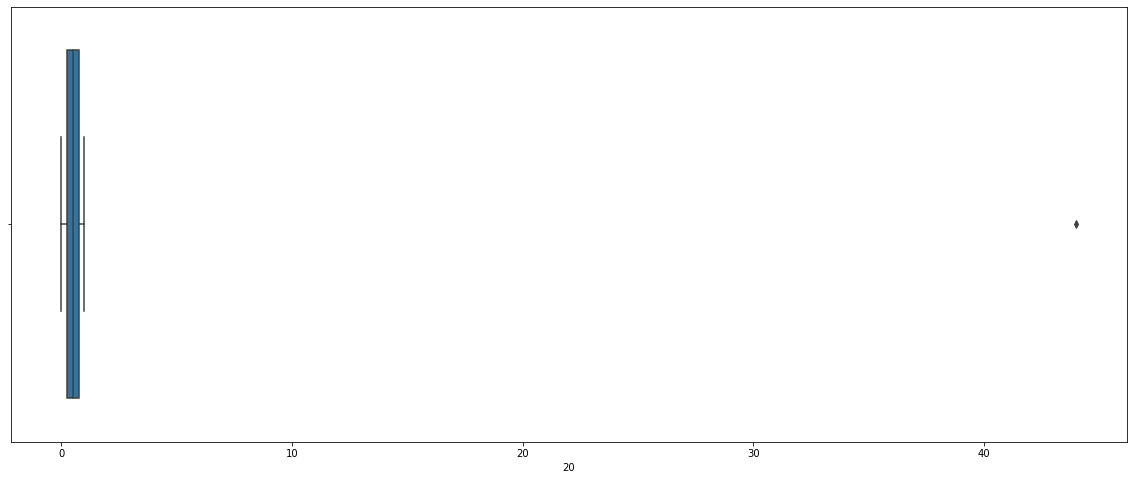

21


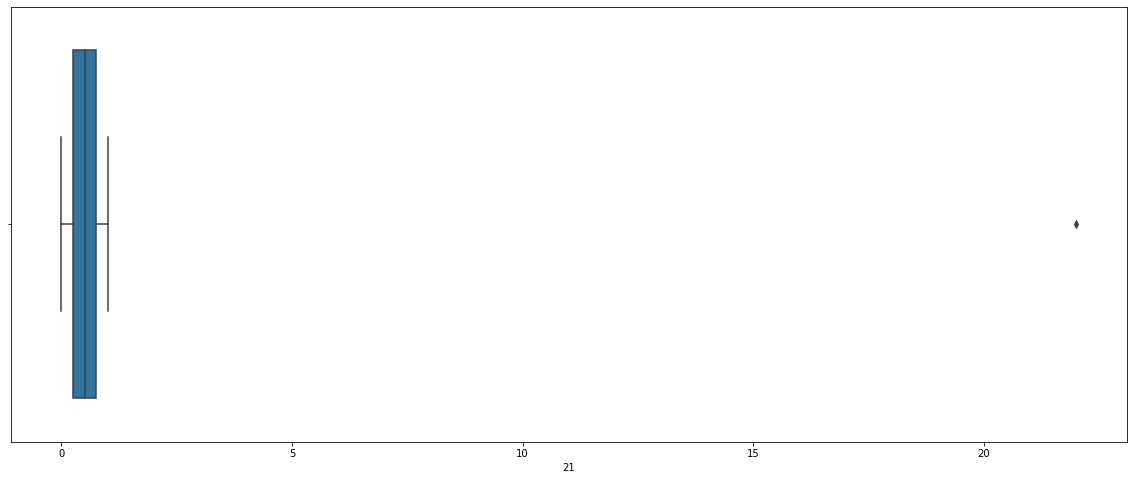

22


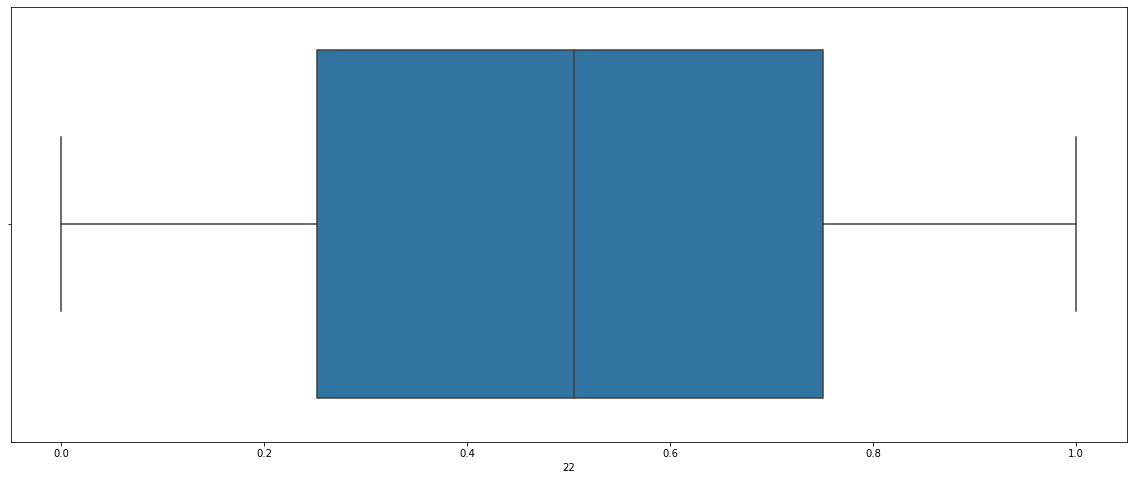

23


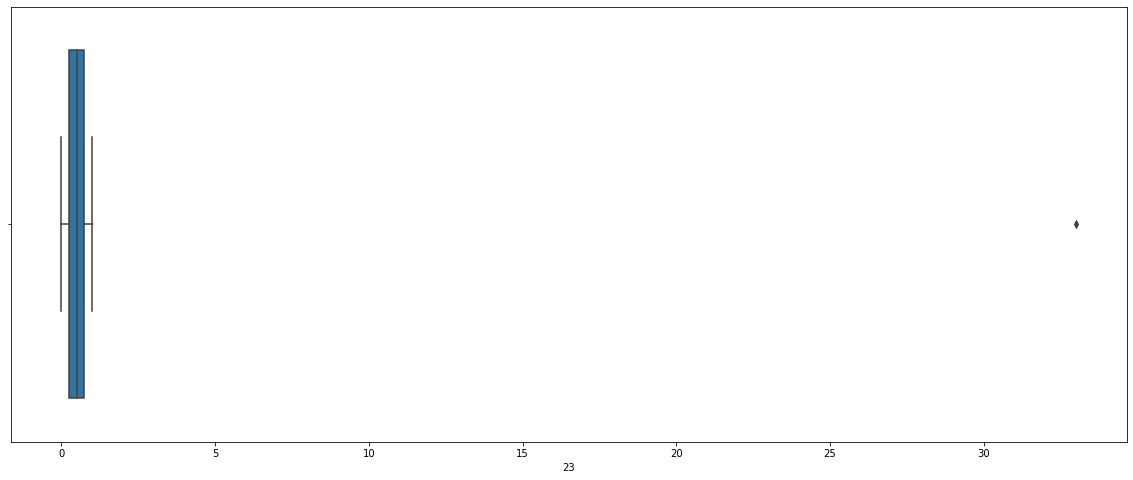

24


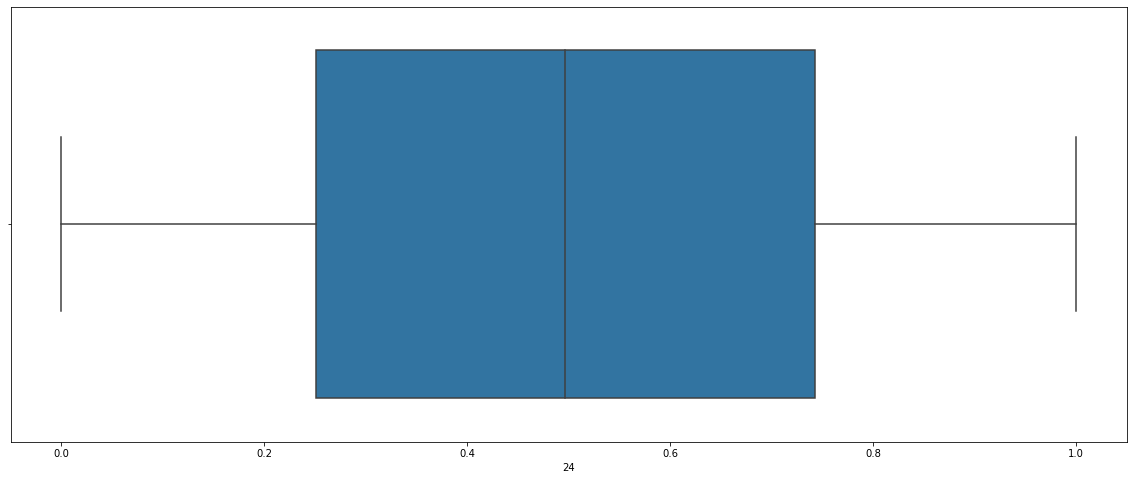

25


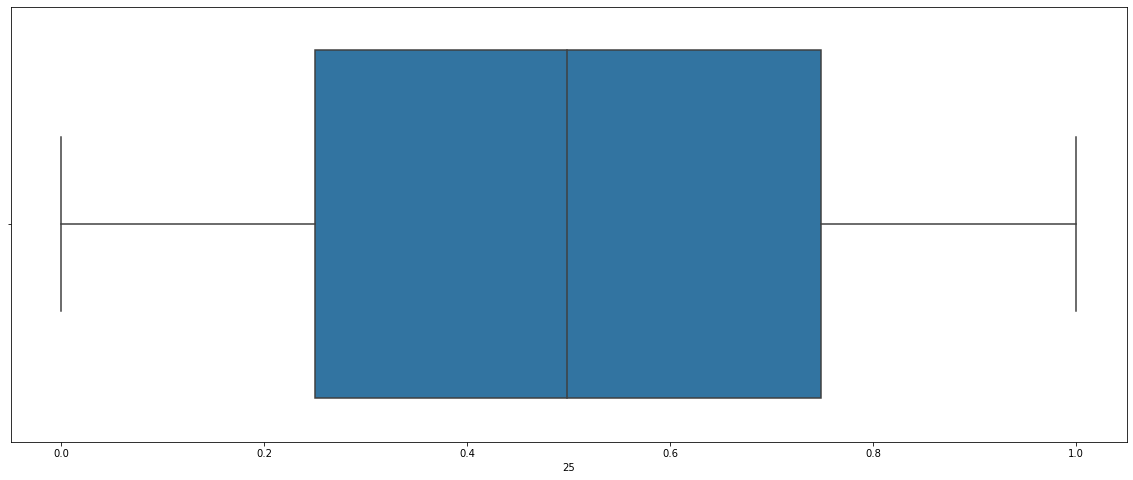

26


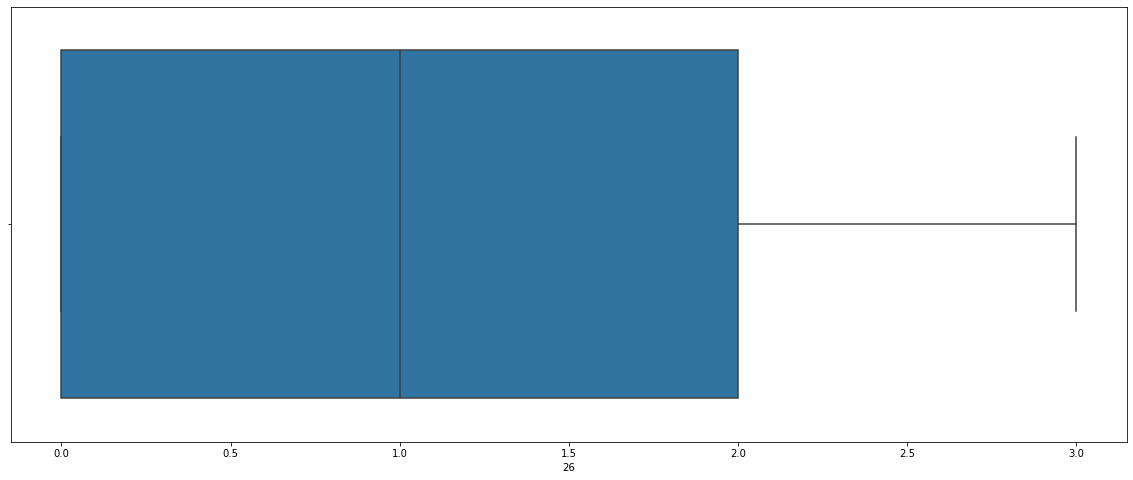

27


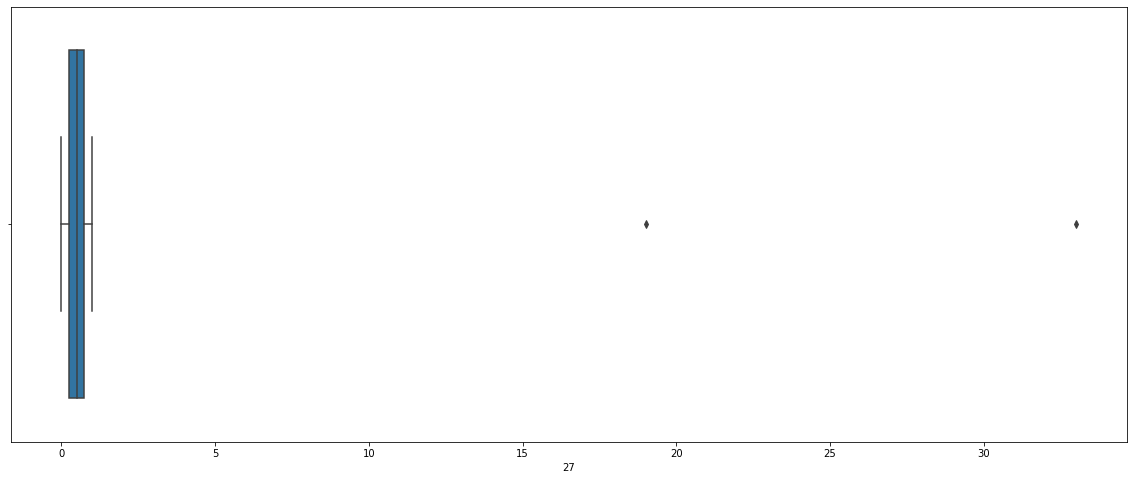

28


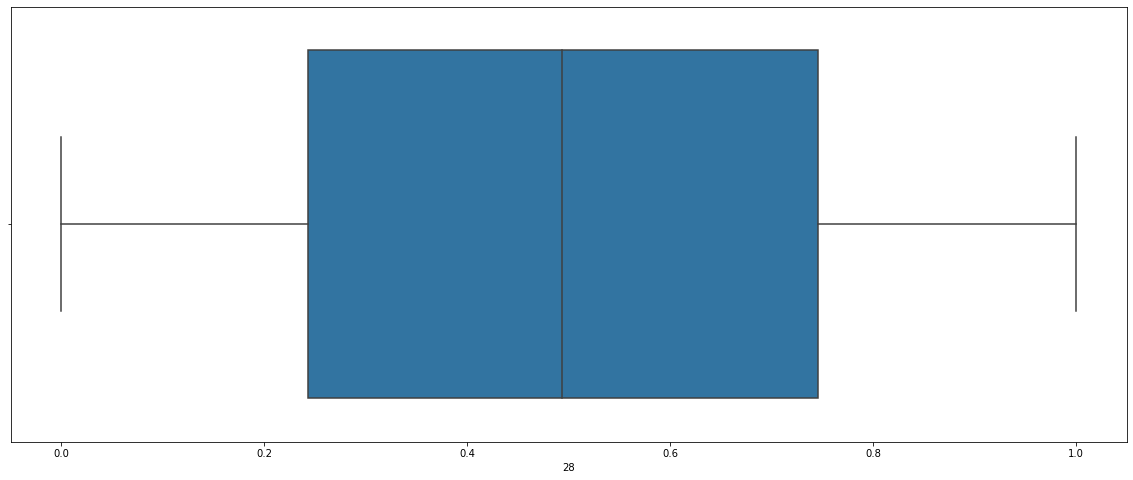

In [14]:
for i in micron_x.columns:
    plt.figure(figsize=(20,8))
    print(i)
    sns.boxplot(micron_x.loc[:,i])
    plt.show()

In [15]:
for i in micron_x.columns:
    q75,q25 = np.percentile(micron_x.loc[:,i],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    micron_x.loc[micron_x.loc[:,i] < min, i] = min
    micron_x.loc[micron_x.loc[:,i] > max, i] = max

Text(0, 0.5, 'Precentage')

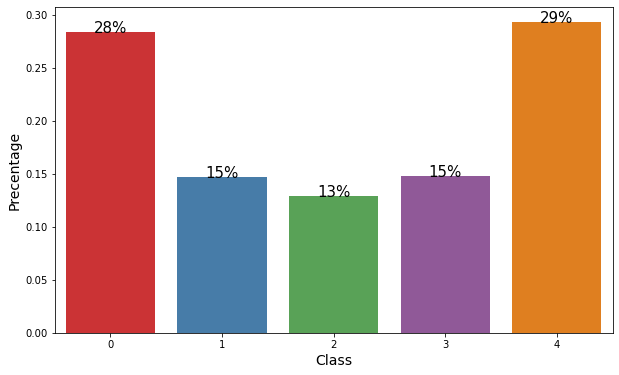

In [16]:
plt.figure(figsize=(10,6))
g = sns.barplot(micron_y, micron_y, palette='Set1', estimator=lambda x: len(x) / len(micron_y) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Class', fontsize=14)
plt.ylabel('Precentage', fontsize=14)

In [17]:
micron_x.iloc[:,0:10].describe()

,0,1,2,4,5,6,7,8,9,10
count,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000
mean,0.497416,0.502429,0.494918,0.498125,0.501566,0.504650,0.502949,0.499188,0.495621,1.506794
std,0.290378,0.289872,0.288804,0.286782,0.288213,0.289188,0.287547,0.288968,0.289226,0.498663
min,0.000027,0.000091,0.000004,0.000010,0.000005,0.000062,0.000006,0.000028,0.000012,0.120434
25%,0.241130,0.253428,0.246246,0.251793,0.251797,0.252292,0.256196,0.251314,0.245523,1.161831
50%,0.496566,0.502124,0.490495,0.495894,0.502583,0.506367,0.508189,0.496118,0.492651,1.508540
75%,0.748921,0.755959,0.743823,0.745342,0.751882,0.758020,0.748301,0.750380,0.745178,1.856096
max,0.999991,0.999966,0.999946,1.485666,1.502009,0.999948,0.999886,1.498979,1.494660,2.897493


In [18]:
micron_x.iloc[:,10:20].describe()

,11,12,13,14,15,16,17,18,19,20
count,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000
mean,0.498934,0.499322,0.503702,0.503143,0.502268,0.498345,0.495767,0.497568,29.559234,0.500282
std,0.288473,0.289944,0.289311,0.289507,0.287337,0.288740,0.289563,0.286066,21.587394,0.288840
min,0.000048,0.000025,0.000225,0.000022,0.000055,0.000010,0.000163,0.000058,5.000000,0.000128
25%,0.249635,0.247147,0.254372,0.253594,0.257604,0.250291,0.243296,0.252146,11.658374,0.248314
50%,0.498013,0.500812,0.505666,0.504531,0.503188,0.496416,0.492491,0.498322,23.188448,0.500662
75%,0.750102,0.748006,0.756904,0.754694,0.751370,0.747897,0.746783,0.743370,42.682542,0.751316
max,0.999977,1.499294,1.510702,0.999841,1.492019,0.999975,0.999742,1.480204,89.218794,1.505818


In [19]:
micron_x.iloc[:,20:30].describe()

,21,22,23,24,25,26,27,28
count,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000,17930.000000
mean,0.501159,0.501624,0.497107,0.497438,0.499131,1.495650,0.498418,0.496044
std,0.289795,0.287850,0.288003,0.287855,0.288107,1.119154,0.288710,0.288059
min,0.000040,0.000025,0.000014,0.000168,0.000021,0.000000,0.000010,0.000043
25%,0.249934,0.251800,0.246246,0.250598,0.250345,0.000000,0.250638,0.243309
50%,0.503831,0.505193,0.496341,0.496385,0.498202,1.000000,0.494618,0.493042
75%,0.753459,0.750321,0.744940,0.743172,0.748939,2.000000,0.746931,0.745249
max,1.508748,0.999909,1.492981,0.999900,0.999859,3.000000,1.491370,0.999877


In [20]:
scaler = preprocessing.MinMaxScaler()
micron_x['19'] = scaler.fit_transform(micron_x[['19']])
micron_x['4'] = scaler.fit_transform(micron_x[['4']])
micron_x['5'] = scaler.fit_transform(micron_x[['5']])
micron_x['8'] = scaler.fit_transform(micron_x[['8']])
micron_x['9'] = scaler.fit_transform(micron_x[['9']])
micron_x['10'] = scaler.fit_transform(micron_x[['10']])
micron_x['12'] = scaler.fit_transform(micron_x[['12']])
micron_x['13'] = scaler.fit_transform(micron_x[['13']])
micron_x['15'] = scaler.fit_transform(micron_x[['15']])
micron_x['18'] = scaler.fit_transform(micron_x[['18']])
micron_x['20'] = scaler.fit_transform(micron_x[['20']])
micron_x['21'] = scaler.fit_transform(micron_x[['21']])
micron_x['23'] = scaler.fit_transform(micron_x[['23']])
micron_x['26'] = scaler.fit_transform(micron_x[['26']])
micron_x['27'] = scaler.fit_transform(micron_x[['27']])

In [21]:
trainX,testX,trainY,testY = train_test_split(micron_x,micron_y, test_size=0.25, random_state = 100)

In [22]:
lr = LogisticRegression()
lr.fit(trainX,trainY)
y_test_pred=lr.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))

0.45205781229500963
              precision    recall  f1-score   support

           0       0.57      0.99      0.72      1255
           1       0.23      0.01      0.02       707
           2       0.85      0.10      0.18       571
           3       0.43      0.03      0.05       645
           4       0.60      0.99      0.75      1305

    accuracy                           0.58      4483
   macro avg       0.54      0.42      0.34      4483
weighted avg       0.54      0.58      0.45      4483



In [23]:

import seaborn as sns
lr = LogisticRegression()


#Setting the range for class weights
# weights = np.linspace(0.0,10,10)
C = np.logspace(-10,10,50)

def scoring(Y,Y_pred,scaler= None):
    return f1_score(Y,Y_pred,average='weighted')

scorer = make_scorer(scoring, greater_is_better = True)

bestscoredf = pd.DataFrame(columns = ['BestScore','BestHyp'])

# # Creating a dictionary grid for grid search
for i in np.linspace(0.0,1,10):
    for j in np.linspace(0.0,1,10):
                    param_grid = {'class_weight': [{0:i, 1:j, 2:j, 3:j,4:i}], 
                                  'penalty' : ['l1', 'l2'], 'C' : C, 'max_iter': [10,100,1000,100000,1000000] }

#Fitting grid search to the train data with 5 folds
                    gridsearch = RandomizedSearchCV(estimator= lr, 
                           param_distributions= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=scorer, 
                          verbose=2).fit(trainX, trainY)
                    bestscoredf.loc[len(bestscoredf.index)] = [gridsearch.best_score_,gridsearch.best_params_]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    3.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    2.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    2.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    2.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    2.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    2.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    3.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished


In [24]:
BestHypPaams = pd.DataFrame(columns = ['Hyp','val'])
for i in bestscoredf[bestscoredf.BestScore == bestscoredf.BestScore.max()].BestHyp:
    for j in i:
        BestHypPaams.loc[len(BestHypPaams.index)] = [j,i[j]]

In [25]:
logistic = LogisticRegression(C=float(BestHypPaams[BestHypPaams['Hyp'] == 'C'].val.item()) ,
                              class_weight = BestHypPaams[BestHypPaams['Hyp'] == 'class_weight'].val.item(),
                              max_iter= float(BestHypPaams[BestHypPaams['Hyp'] == 'max_iter'].val.item()), 
                              penalty= BestHypPaams[BestHypPaams['Hyp'] == 'penalty'].val.item())

In [26]:
logistic.fit(trainX,trainY)
y_test_pred=logistic.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))

0.705451265425561
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1255
           1       0.60      0.56      0.58       707
           2       0.61      0.32      0.42       571
           3       0.55      0.62      0.58       645
           4       0.81      0.87      0.84      1305

    accuracy                           0.72      4483
   macro avg       0.67      0.65      0.65      4483
weighted avg       0.71      0.72      0.71      4483



In [27]:
rfe = RFECV(LogisticRegression(C=float(BestHypPaams[BestHypPaams['Hyp'] == 'C'].val.item()) ,
                              class_weight = BestHypPaams[BestHypPaams['Hyp'] == 'class_weight'].val.item(),
                              max_iter= float(BestHypPaams[BestHypPaams['Hyp'] == 'max_iter'].val.item()), 
                              penalty= BestHypPaams[BestHypPaams['Hyp'] == 'penalty'].val.item()))
rfe.fit(trainX,trainY)
for i in range(trainX.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (trainX.columns[i], rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 3.000
Column: 7, Selected False, Rank: 2.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selected True, Rank: 1.000
Column: 26, Selected False, Ran

In [28]:
for i in trainX.columns[rfe.support_ == False]:
    trainX = trainX.drop([i],axis = 1)
    testX = testX.drop([i],axis = 1)

In [29]:
logistic = LogisticRegression(C=float(BestHypPaams[BestHypPaams['Hyp'] == 'C'].val.item()) ,
                              class_weight = BestHypPaams[BestHypPaams['Hyp'] == 'class_weight'].val.item(),
                              max_iter= float(BestHypPaams[BestHypPaams['Hyp'] == 'max_iter'].val.item()), 
                              penalty= BestHypPaams[BestHypPaams['Hyp'] == 'penalty'].val.item())
logistic.fit(trainX,trainY)
y_test_pred=logistic.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))

0.7109025998738009
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1255
           1       0.60      0.55      0.57       707
           2       0.61      0.33      0.43       571
           3       0.57      0.64      0.60       645
           4       0.82      0.87      0.85      1305

    accuracy                           0.72      4483
   macro avg       0.68      0.66      0.66      4483
weighted avg       0.71      0.72      0.71      4483



In [30]:
trainX,testX,trainY,testY = train_test_split(micron_x,micron_y, test_size=0.25, random_state = 100)

In [31]:
model = RandomForestClassifier()
model.fit(trainX,trainY)
y_test_pred=model.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))
confusion_matrix(testY, y_test_pred)

0.41044469897306063
              precision    recall  f1-score   support

           0       0.54      0.95      0.69      1255
           1       0.18      0.01      0.02       707
           2       0.35      0.01      0.03       571
           3       0.25      0.02      0.04       645
           4       0.57      0.93      0.70      1305

    accuracy                           0.54      4483
   macro avg       0.38      0.39      0.30      4483
weighted avg       0.42      0.54      0.41      4483



array([[1197,   10,    5,    3,   40],
       [ 551,    8,    3,    6,  139],
       [ 271,   12,    8,   12,  268],
       [ 139,   12,    3,   15,  476],
       [  64,    3,    4,   25, 1209]], dtype=int64)

In [32]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(trainX,trainY)
y_test_pred=model.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))
confusion_matrix(testY, y_test_pred)

0.405488854747123
              precision    recall  f1-score   support

           0       0.54      0.95      0.69      1255
           1       0.38      0.01      0.03       707
           2       0.21      0.01      0.01       571
           3       0.24      0.01      0.02       645
           4       0.56      0.95      0.70      1305

    accuracy                           0.55      4483
   macro avg       0.39      0.39      0.29      4483
weighted avg       0.44      0.55      0.41      4483



array([[1193,    7,    2,    1,   52],
       [ 541,   10,    4,    2,  150],
       [ 274,    2,    3,    5,  287],
       [ 151,    4,    4,    5,  481],
       [  55,    3,    1,    8, 1238]], dtype=int64)

In [33]:
model = RandomForestClassifier(class_weight='balanced_subsample')
model.fit(trainX,trainY)
y_test_pred=model.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))
confusion_matrix(testY, y_test_pred)

0.4084371324904916
              precision    recall  f1-score   support

           0       0.54      0.96      0.69      1255
           1       0.55      0.02      0.03       707
           2       0.38      0.01      0.02       571
           3       0.31      0.01      0.03       645
           4       0.56      0.94      0.70      1305

    accuracy                           0.55      4483
   macro avg       0.47      0.39      0.29      4483
weighted avg       0.49      0.55      0.41      4483



array([[1200,    4,    1,    1,   49],
       [ 543,   12,    2,    1,  149],
       [ 286,    3,    5,    5,  272],
       [ 134,    0,    3,    9,  499],
       [  60,    3,    2,   13, 1227]], dtype=int64)

In [34]:
model = RandomForestClassifier()

def scoring(Y,Y_pred,scaler= None):
    return f1_score(Y,Y_pred,average='weighted')

scorer = make_scorer(scoring, greater_is_better = True)
randomForDf = pd.DataFrame(columns = ['score','hyp'])

param_grid1 = {
     'criterion' : ['gini','entropy']
                ,'max_depth' : list(range(10,20))
                ,'min_samples_leaf' : list(range(7,14))
                ,'ccp_alpha' : np.logspace(-10,10,25)
                ,'warm_start' : [True,False]
             } 

for i in np.linspace(0,1,10):
    for j in np.linspace(0,1,10):

        param_grid = {
                    'criterion' : ['gini','entropy']
                    ,'max_depth' : list(range(10,20))
                    ,'min_samples_leaf' : list(range(7,14))
                    ,'ccp_alpha' : np.logspace(-10,10,25)
                    ,'warm_start' : [True,False]
                    ,'class_weight' : [{0:i,1:j,2:j,3:j,4:i}]
                     }
#Fitting grid search to the train data with 5 folds
        gridsearch = RandomizedSearchCV(estimator= model, 
                           param_distributions= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=scorer, 
                          verbose=2).fit(trainX, trainY)

        randomForDf.loc[len(randomForDf.index)] = [gridsearch.best_score_,gridsearch.best_params_]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   21.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   26.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   26.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   26.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   51.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   52.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   52.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   48.6s finished


In [35]:
BestHypPaamsRF = pd.DataFrame(columns = ['Hyp','val'])
for i in randomForDf[randomForDf.score == randomForDf.score.max()].hyp:
    for j in i:
        BestHypPaamsRF.loc[len(BestHypPaamsRF.index)] = [j,i[j]]

In [36]:
model1 = RandomForestClassifier()
param_grid = {'criterion' : [BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'criterion'].val.item()]
                    ,'max_depth' : [BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'max_depth'].val.item()]
                    ,'min_samples_leaf' : [BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'min_samples_leaf'].val.item(),9]
                    ,'ccp_alpha' : np.logspace(-30,30,1000)
                    ,'warm_start' : [BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'warm_start'].val.item()]
              ,'bootstrap':[True,False]
                      ,'min_samples_split' : list(range(0,14))
                    ,'class_weight' : [BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'class_weight'].val.item(),'balanced','balanced_subsample']
                     }
gridsearch = RandomizedSearchCV(estimator= model1, 
                           param_distributions= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=scorer, 
                          verbose=2).fit(trainX, trainY)

print('Best Score: %s' % gridsearch.best_score_)
print('Best Hyperparameters: %s' % gridsearch.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.6s finished


Best Score: 0.4762179828533884
Best Hyperparameters: {'warm_start': False, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_depth': 19, 'criterion': 'gini', 'class_weight': {0: 0.4444444444444444, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.4444444444444444}, 'ccp_alpha': 2.1844360711494285e-11, 'bootstrap': True}


In [37]:
modelRF = RandomForestClassifier (criterion = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'criterion'].val.item()
                    ,max_depth = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'max_depth'].val.item()
                    ,min_samples_leaf = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'min_samples_leaf'].val.item()
                    ,ccp_alpha = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'ccp_alpha'].val.item()
                    ,warm_start = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'warm_start'].val.item()
                    ,class_weight = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'class_weight'].val.item())
modelRF.fit(trainX,trainY)
y_test_pred=modelRF.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))

0.4733963243924297
              precision    recall  f1-score   support

           0       0.60      0.82      0.69      1255
           1       0.30      0.19      0.23       707
           2       0.20      0.05      0.09       571
           3       0.24      0.16      0.19       645
           4       0.61      0.82      0.70      1305

    accuracy                           0.53      4483
   macro avg       0.39      0.41      0.38      4483
weighted avg       0.45      0.53      0.47      4483



In [38]:
rfe = RFECV(RandomForestClassifier (criterion = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'criterion'].val.item()
                    ,max_depth = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'max_depth'].val.item()
                    ,min_samples_leaf = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'min_samples_leaf'].val.item()
                    ,ccp_alpha = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'ccp_alpha'].val.item()
                    ,warm_start = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'warm_start'].val.item()
                    ,class_weight = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'class_weight'].val.item()))
rfe.fit(trainX,trainY)
for i in range(trainX.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (trainX.columns[i], rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 6.000
Column: 2, Selected False, Rank: 2.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected False, Rank: 5.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selected True, Rank: 1.000
Column: 26, Selected False, R

In [39]:
for i in trainX.columns[rfe.support_ == False]:
    trainX = trainX.drop([i],axis = 1)
    testX = testX.drop([i],axis = 1)

In [40]:
modelRF = RandomForestClassifier (criterion = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'criterion'].val.item()
                    ,max_depth = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'max_depth'].val.item()
                    ,min_samples_leaf = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'min_samples_leaf'].val.item()
                    ,ccp_alpha = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'ccp_alpha'].val.item()
                    ,warm_start = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'warm_start'].val.item()
                    ,class_weight = BestHypPaamsRF[BestHypPaamsRF['Hyp'] == 'class_weight'].val.item())
modelRF.fit(trainX,trainY)
y_test_pred=modelRF.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))

0.4781437555761105
              precision    recall  f1-score   support

           0       0.61      0.81      0.70      1255
           1       0.27      0.18      0.22       707
           2       0.28      0.07      0.11       571
           3       0.23      0.18      0.20       645
           4       0.62      0.81      0.70      1305

    accuracy                           0.53      4483
   macro avg       0.40      0.41      0.39      4483
weighted avg       0.46      0.53      0.48      4483



In [41]:
trainX,testX,trainY,testY = train_test_split(micron_x,micron_y, test_size=0.25, random_state = 100)

In [42]:
model = SVC()
model.fit(trainX,trainY)
y_test_pred=model.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))
confusion_matrix(testY, y_test_pred)

0.6242909113657121
              precision    recall  f1-score   support

           0       0.72      0.94      0.82      1255
           1       0.46      0.30      0.37       707
           2       0.41      0.31      0.36       571
           3       0.46      0.26      0.33       645
           4       0.76      0.93      0.84      1305

    accuracy                           0.66      4483
   macro avg       0.56      0.55      0.54      4483
weighted avg       0.62      0.66      0.62      4483



array([[1175,   61,    5,    0,   14],
       [ 340,  215,  108,   20,   24],
       [  68,  150,  179,  127,   47],
       [  24,   37,  124,  169,  291],
       [  17,    1,   19,   51, 1217]], dtype=int64)

In [43]:
model = SVC(class_weight='balanced')
model.fit(trainX,trainY)
y_test_pred=model.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))
confusion_matrix(testY, y_test_pred)

0.6227931897035197
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1255
           1       0.42      0.46      0.44       707
           2       0.32      0.40      0.35       571
           3       0.43      0.39      0.41       645
           4       0.83      0.77      0.80      1305

    accuracy                           0.62      4483
   macro avg       0.56      0.56      0.56      4483
weighted avg       0.63      0.62      0.62      4483



array([[ 942,  275,   24,    0,   14],
       [ 157,  328,  185,   14,   23],
       [  49,  139,  229,  112,   42],
       [  24,   31,  215,  250,  125],
       [  17,    0,   73,  205, 1010]], dtype=int64)

In [44]:
model = SVC()
def scoring(Y,Y_pred,scaler= None):
    return f1_score(Y,Y_pred,average='weighted')

scorer = make_scorer(scoring, greater_is_better = True)

SVCdf = pd.DataFrame(columns = ['score','hyp'])

for i in np.linspace(0,1,10):
    for j in np.linspace(0,1,10):
        param_grid = {
            'C' : np.logspace(-10,10,25)
            ,'class_weight' : [{0:i,1:j,2:j,3:j,4:i}],
             }

#Fitting grid search to the train data with 5 folds
        gridsearch = RandomizedSearchCV(estimator= model, 
                           param_distributions= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=scorer, 
                          verbose=2).fit(trainX, trainY)

#         print('Best Score: %s' % gridsearch.best_score_)
#         print('Best Hyperparameters: %s' % gridsearch.best_params_)
        SVCdf.loc[len(SVCdf.index)] = [gridsearch.best_score_,gridsearch.best_params_]


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


In [45]:
SVCdf.score.max()

0.643129464773897

In [46]:
BestHypPaamsSV = pd.DataFrame(columns = ['Hyp','val'])
for i in SVCdf[SVCdf.score == SVCdf.score.max()].hyp:
    for j in i:
        BestHypPaamsSV.loc[len(BestHypPaamsSV.index)] = [j,i[j]]

In [47]:
BestHypPaamsSV

,Hyp,val
0,class_weight,"{0: 0.6666666666666666, 1: 0.8888888888888888,..."
1,C,1


In [48]:
model = SVC()

def scoring(Y,Y_pred,scaler= None):
    return f1_score(Y,Y_pred,average='weighted')

scorer = make_scorer(scoring, greater_is_better = True)
param_grid = {'C' : np.logspace(-10,10,400) 
              ,'kernel' : [ 'poly','sigmoid', 'rbf']
              ,'degree' : list(range(3,8))
              ,'coef0' : list(range(1,10))
              ,'decision_function_shape':['ovr','ovo']
              ,'class_weight' : [BestHypPaamsSV[BestHypPaamsSV['Hyp'] == 'class_weight'].val.item()]}

gridsearch = RandomizedSearchCV(estimator= model, 
                                    param_distributions= param_grid,
                                    cv=StratifiedKFold(), 
                                    n_jobs=-1, 
                                    scoring=scorer, 
                                    verbose=2).fit(trainX, trainY)

print('Best Score: %s' % gridsearch.best_score_)
print('Best Hyperparameters: %s' % gridsearch.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


Best Score: 0.6764201932227398
Best Hyperparameters: {'kernel': 'poly', 'degree': 5, 'decision_function_shape': 'ovo', 'coef0': 6, 'class_weight': {0: 0.6666666666666666, 1: 0.8888888888888888, 2: 0.8888888888888888, 3: 0.8888888888888888, 4: 0.6666666666666666}, 'C': 1.4551483398731937e-05}


In [49]:
modelSVC = SVC (kernel = gridsearch.best_params_['kernel']
                    ,degree = gridsearch.best_params_['degree']
                    ,decision_function_shape = gridsearch.best_params_['decision_function_shape']
                    ,coef0 = gridsearch.best_params_['coef0']
                    ,class_weight = gridsearch.best_params_['class_weight']
                    ,C = gridsearch.best_params_['C'])
modelSVC.fit(trainX,trainY)
y_test_pred=modelSVC.predict(testX)
print(f1_score(testY,y_test_pred,average='weighted'))
print(classification_report(testY, y_test_pred))

0.6802382943591977
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1255
           1       0.54      0.69      0.60       707
           2       0.38      0.10      0.15       571
           3       0.55      0.64      0.59       645
           4       0.83      0.90      0.86      1305

    accuracy                           0.70      4483
   macro avg       0.62      0.63      0.61      4483
weighted avg       0.68      0.70      0.68      4483

